In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [10]:
df["job"].replace({"admin.": "admin"}, inplace=True)


C:\Users\binar\AppData\Local\Temp\ipykernel_16500\1340768125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [11]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [13]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

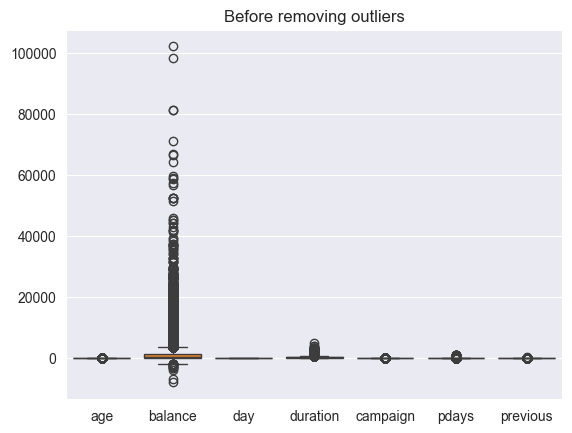

In [14]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df.to_csv("Delimeted_Dataset.csv")

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].str.lower().map(month_mapping)

df['education'] = label_encoder.fit_transform(df['education'])



df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)
df=df.astype(int)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [20]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [21]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [22]:
Pearson_Correlation = df.corr(method='pearson')


for col in Pearson_Correlation.columns:
    for index in Pearson_Correlation.index:
        if Pearson_Correlation.loc[index, col] > 0.9 and index != col:
            print(f"{index} and {col}: {Pearson_Correlation.loc[index, col]}")


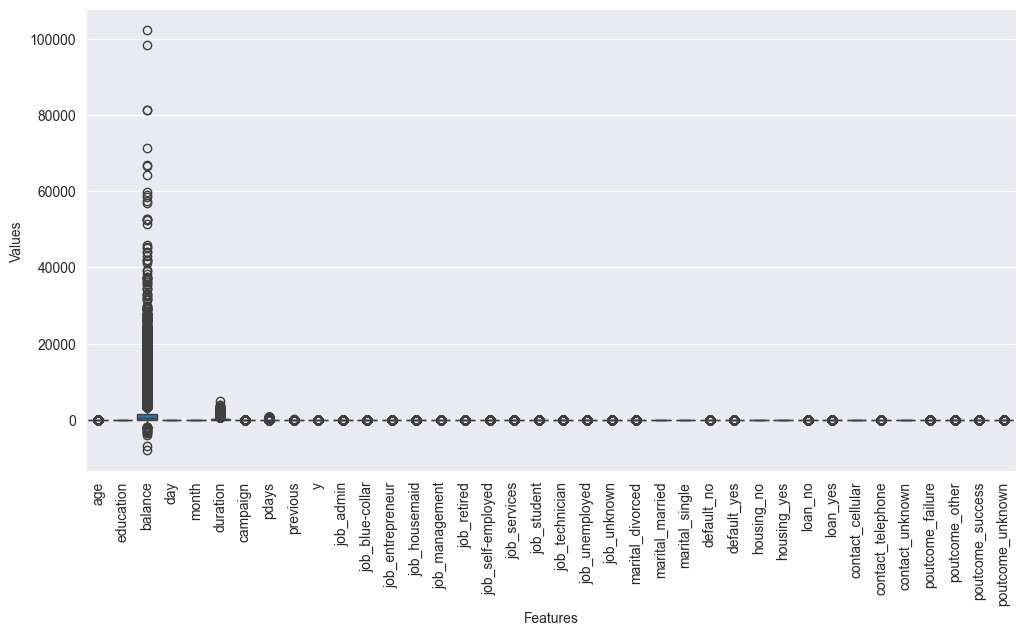

In [23]:
df_melted = df.melt(var_name="Features", value_name="Values")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Features", y="Values")
plt.xticks(rotation=90)
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['age','balance', 'duration']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,2,0.092259,5,5,0.053070,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,1,0.073067,5,5,0.030704,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,1,0.072822,5,5,0.015453,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,3,0.086476,5,5,0.018707,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,3,0.072812,5,5,0.040260,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [35]:
from sklearn.decomposition import PCA



X=df.iloc[:,10:]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)
pca_columns = X_pca[:, :1]
pca_data = np.concatenate([pca_columns], axis=1)
pca_df = pd.DataFrame(pca_data, columns=['PCA'])
pca_df.head()



Explained Variance Ratio: [0.18801226 0.13688756]


,PCA
0,-0.978994
1,-0.847411
2,-1.145464
3,-1.248597
4,0.264768


In [37]:
new_df=pd.concat([df.iloc[:,0:10],pca_df], axis=1)
new_df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,PCA
0,58,2,0.092259,5,5,0.053070,1,-1,0,0,-0.978994
1,44,1,0.073067,5,5,0.030704,1,-1,0,0,-0.847411
2,33,1,0.072822,5,5,0.015453,1,-1,0,0,-1.145464
3,47,3,0.086476,5,5,0.018707,1,-1,0,0,-1.248597
4,33,3,0.072812,5,5,0.040260,1,-1,0,0,0.264768


,PCA
0,-41.118407
1,-41.087730
2,-41.149249
3,-41.161980
4,-41.159369


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=new_df.drop(["y"], axis=1)
Y=new_df["y"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

y_train_pred =rf.predict(X_train)

training_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

y_val_pred = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

from sklearn.metrics import classification_report
print(classification_report(Y_test, rf.predict(X_test)))

Training Accuracy: 100.00%
Validation Accuracy: 90.60%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8018
           1       0.63      0.41      0.50      1025

    accuracy                           0.91      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.91      0.90      9043



1, trainng Loss: 0.3415, val Loss: 0.3168
2, trainng Loss: 0.3078, val Loss: 0.2966
3, trainng Loss: 0.2953, val Loss: 0.2871
4, trainng Loss: 0.2803, val Loss: 0.2841
5, trainng Loss: 0.2693, val Loss: 0.2668
6, trainng Loss: 0.2617, val Loss: 0.2747
7, trainng Loss: 0.2578, val Loss: 0.2572
8, trainng Loss: 0.2565, val Loss: 0.2573
9, trainng Loss: 0.2544, val Loss: 0.2538
10, trainng Loss: 0.2527, val Loss: 0.2502


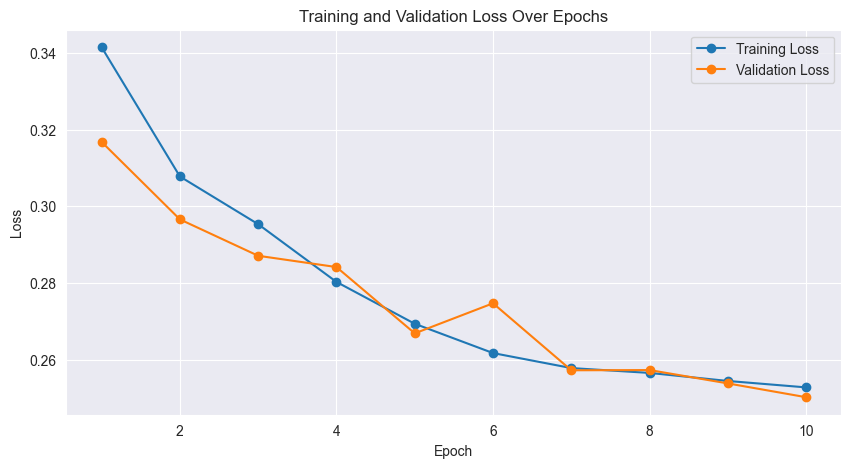

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11988
           1       0.60      0.34      0.44      1576

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [39]:
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch.nn as nn
import torch.optim as optim


input = torch.tensor(df.drop(columns=['y']).values, dtype=torch.float32)
target = torch.tensor(df['y'].values, dtype=torch.long)


dataset = TensorDataset(input, target)
train_dataset, val_dataset = random_split(dataset, [int(0.7 * len(df)), len(df) - int(0.7 * len(df))])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

input_size = input.shape[1]


model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    training_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    validation_losses.append(val_loss)

    print(f"{epoch + 1}, trainng Loss: {train_loss:.4f}, val Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

y_pred = []
y_val = []
model.eval()
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        y_pred.append(torch.argmax(outputs, dim=1))
        y_val.append(targets)

y_pred = torch.cat(y_pred)
y_val = torch.cat(y_val)

print(classification_report(y_val.numpy(), y_pred.numpy()))
